In [1]:
import pandas as pd
import numpy as np

In [3]:
train_file_path = r'C:\Users\binay_\OneDrive - Cadence Preferred, LLC\Anaconda3\Untitled Folder\titanic\train.csv'
test_file_path = r'C:\Users\binay_\OneDrive - Cadence Preferred, LLC\Anaconda3\Untitled Folder\titanic\test.csv'

# train_file_path = r'C:\Users\binay raut\OneDrive - Cadence Preferred, LLC\Anaconda3\Untitled Folder\titanic\train.csv'
# test_file_path = r'C:\Users\binay raut\OneDrive - Cadence Preferred, LLC\Anaconda3\Untitled Folder\titanic\test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

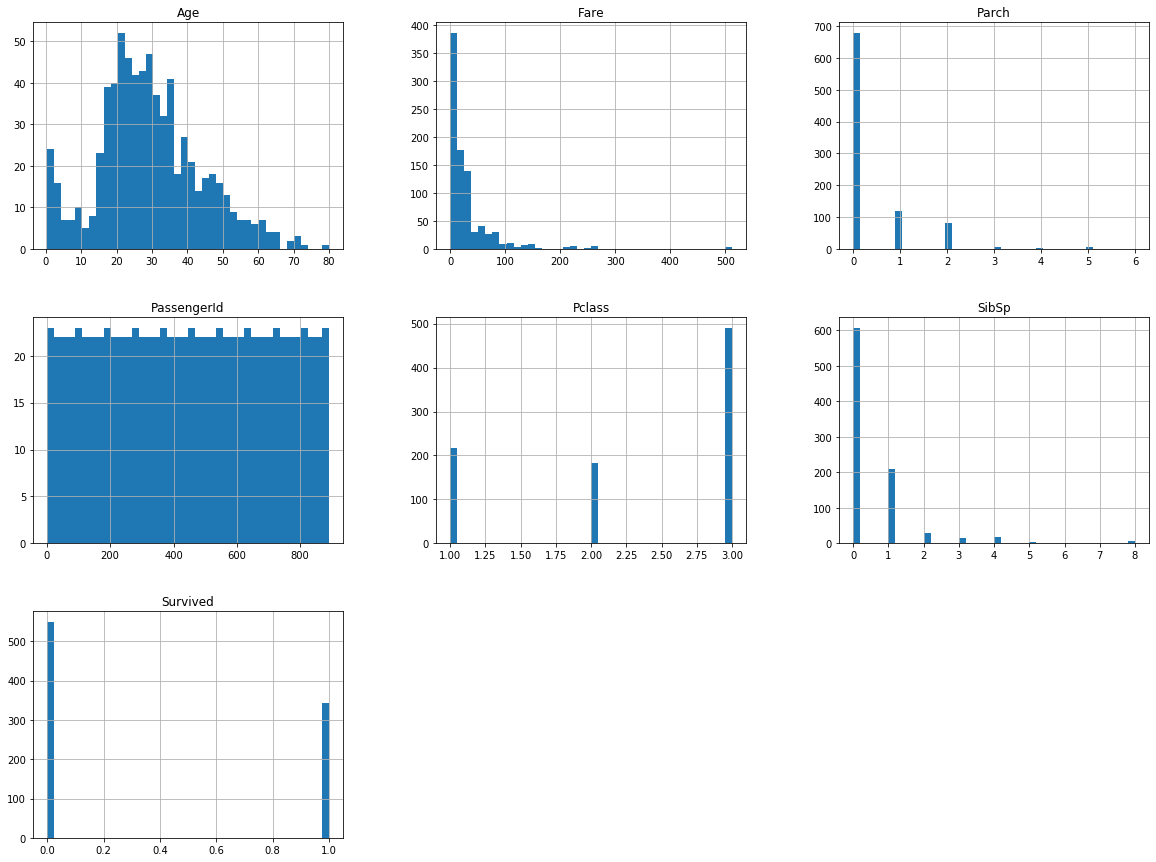

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins = 40, figsize= (20,15))

plt.show()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Seperate Title from name and save it to "Title" Field
train_df["Title"] = train_df["Name"].apply(lambda x: x.split(',')[1].split()[0])

In [7]:
train_df["Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Ms.            1
the            1
Don.           1
Mme.           1
Jonkheer.      1
Capt.          1
Lady.          1
Sir.           1
Name: Title, dtype: int64

In [8]:
# Keep top 4 most common titles and assign "Other" values to rest of the titles
title_list = ["Mr.", "Miss.", "Mrs.", "Master."]
all_titles = train_df["Title"].unique()
replace_list = [title for title in all_titles if title not in title_list]
train_df= train_df.apply(lambda title: title.replace(to_replace=replace_list,value= "Other" ))
train_df["Title"].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Other       27
Name: Title, dtype: int64

In [9]:
# Inspect Embarked column as it also was missing some values
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Save training dataframe with missing age value as test DF. We will fill in the missing values from the model
age_na_test = train_df[train_df['Age'].isna()].copy()
age_na_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 13 columns):
PassengerId    177 non-null int64
Survived       177 non-null int64
Pclass         177 non-null int64
Name           177 non-null object
Sex            177 non-null object
Age            0 non-null float64
SibSp          177 non-null int64
Parch          177 non-null int64
Ticket         177 non-null object
Fare           177 non-null float64
Cabin          19 non-null object
Embarked       177 non-null object
Title          177 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 19.4+ KB


In [11]:
drop_list = ["PassengerId", "Cabin", "Name", "Ticket"]

age_na_test = age_na_test.drop(drop_list, axis = 1)

In [12]:
age_na_train = train_df[train_df['Age'].notna()].copy()
age_na_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
Title          714 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 78.1+ KB


In [13]:
age_na_train = age_na_train.drop(drop_list, axis =1)
age_na_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Embarked    712 non-null object
Title       714 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [14]:
age_na_train.groupby("Sex").mean()["Survived"]

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [15]:
age_na_train.groupby("Title").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master.,0.583333,2.583333,4.574167,2.194444,1.388889,35.072686
Miss.,0.719178,2.164384,21.773973,0.609589,0.589041,49.557706
Mr.,0.168342,2.356784,32.368090,0.283920,0.178392,26.198219
Mrs.,0.787037,1.990741,35.898148,0.712963,0.916667,44.727238
Other,0.461538,1.346154,42.384615,0.307692,0.076923,39.092631


In [16]:
age_na_train_features = age_na_train.drop("Age", axis = 1)
age_na_train_labels = age_na_train["Age"].copy()

In [17]:
corr_matrix = age_na_train.corr()
corr_matrix["Age"].sort_values(ascending = False)

Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

In [18]:
age_na_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Embarked    712 non-null object
Title       714 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [19]:
from sklearn.impute import SimpleImputer
age_na_empute = age_na_train
imputer = SimpleImputer(strategy = "most_frequent")
imputer.fit(age_na_empute)
X = imputer.transform(age_na_empute)
age_na_empute = pd.DataFrame(X, columns = age_na_empute.columns, index = age_na_train.index)

In [20]:
age_na_empute["Embarked"].isna().value_counts()

False    714
Name: Embarked, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
sex_encoded = ordinal_encoder.fit_transform(age_na_train[['Sex']])
sex_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [22]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
age_embarked_1hot = one_hot_encoder.fit_transform(age_na_empute[["Embarked"]])
age_embarked_1hot



<714x3 sparse matrix of type '<class 'numpy.float64'>'
	with 714 stored elements in Compressed Sparse Row format>

In [23]:
age_embarked_1hot.toarray()
embarked_cols = list(one_hot_encoder.categories_[0])
embarked_cols

['C', 'Q', 'S']

In [24]:
age_sex_1hot = one_hot_encoder.fit_transform(age_na_train[["Sex"]])
age_sex_1hot
sex_cols = list(one_hot_encoder.categories_[0])
sex_cols

['female', 'male']

In [25]:
age_title_1hot = one_hot_encoder.fit_transform(age_na_train[["Title"]])
title_cols = list(one_hot_encoder.categories_[0])
title_cols

['Master.', 'Miss.', 'Mr.', 'Mrs.', 'Other']

In [26]:
age_sex_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [27]:
age_na_empute[age_na_empute["Embarked"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [28]:
age_na_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy= "most_frequent")),
    ('encoder', OneHotEncoder())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('std_scaler', StandardScaler()),
])    

In [30]:
from sklearn.compose import ColumnTransformer
cat_cols = ["Sex", "Embarked","Title"]
num_cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

complete_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])

In [31]:
age_prepared = complete_pipe.fit_transform(age_na_train_features)
age_prepared

array([[-0.82702011,  0.91123237,  0.52457013, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.20916044, -1.47636364,  0.52457013, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.20916044,  0.91123237, -0.55170307, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.20916044, -1.47636364, -0.55170307, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.20916044, -1.47636364, -0.55170307, ...,  1.        ,
         0.        ,  0.        ],
       [-0.82702011,  0.91123237, -0.55170307, ...,  1.        ,
         0.        ,  0.        ]])

In [32]:
age_prepared.shape

(714, 15)

In [33]:
from sklearn.linear_model import LinearRegression
age_lin_reg = LinearRegression()
age_lin_reg.fit(age_prepared, age_na_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
sample_data_features = age_na_train_features.iloc[10:20]
sample_data_labels = age_na_train_labels.iloc[10:20]

sample_prepared = complete_pipe.transform(sample_data_features)

print("Predictions:", age_lin_reg.predict(sample_prepared))
print("Labels:", list(sample_data_labels))

Predictions: [30.44500862 29.58404388 24.52181939 20.78323913 37.48705578  4.92314405
 32.25945352 36.30752475 32.50341279 22.17665989]
Labels: [58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 31.0, 35.0, 34.0, 15.0]


In [35]:
from sklearn.metrics import mean_squared_error

age_prediction = age_lin_reg.predict(age_prepared)
age_lin_mse = mean_squared_error(age_na_train_labels, age_prediction)
age_lin_rmse = np.sqrt(age_lin_mse)
age_lin_rmse

10.988544026530397

In [36]:
from sklearn.tree import DecisionTreeRegressor 

age_tree_reg = DecisionTreeRegressor(random_state=42)
age_tree_reg.fit(age_prepared, age_na_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [37]:
age_tree_predictions = age_tree_reg.predict(age_prepared)
age_tree_mse = mean_squared_error(age_na_train_labels, age_tree_predictions)
age_tree_rmse = np.sqrt(age_tree_mse)
age_tree_rmse

6.138594523155888

In [38]:
from sklearn.ensemble import RandomForestRegressor
age_forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
age_forest_reg.fit(age_prepared, age_na_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [39]:
age_forest_predictions = age_forest_reg.predict(age_prepared)
age_forest_mse = mean_squared_error(age_na_train_labels, age_forest_predictions)
age_forest_rmse = np.sqrt(age_forest_mse)
age_forest_rmse

7.311809446632391

In [40]:
from sklearn.svm import SVR
age_svm_reg = SVR(kernel = "linear")
age_svm_reg.fit(age_prepared, age_na_train_labels)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
age_svm_predictions = age_svm_reg.predict(age_prepared)
age_svm_mse = mean_squared_error(age_na_train_labels, age_svm_predictions)
age_svm_rmse = np.sqrt(age_svm_mse)
age_svm_rmse

11.274325578678638

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(age_lin_reg, age_prepared, age_na_train_labels,
                        scoring= 'neg_mean_squared_error', cv=10)
age_lin_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Dev:", scores.std())
display_scores(age_lin_rmse_scores)

Scores: [10.40693267 12.22022538 10.19711643 11.78565589 10.36314986 12.19218491
 12.3779375  10.80923492 10.5299083  10.93981128]
Mean: 11.182215715372726
Std Dev: 0.8220173534549503


In [44]:
forest_scores = cross_val_score(age_forest_reg, age_prepared, age_na_train_labels,
                        scoring= 'neg_mean_squared_error', cv=10)
age_forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(age_forest_rmse_scores)


Scores: [11.15660334 11.1838947  10.63001126 10.88384817 12.24450847 12.43079178
 14.08140224 11.99544362 12.37279118 12.56959643]
Mean: 11.954889119225076
Std Dev: 0.9757405019215397


In [45]:
scores = cross_val_score(age_tree_reg, age_prepared, age_na_train_labels,
                        scoring= 'neg_mean_squared_error', cv=10)
age_tree_rmse_scores = np.sqrt(-scores)
display_scores(age_tree_rmse_scores)

Scores: [13.23945036 15.06958393 11.9570199  13.29179062 14.2515388  12.56775327
 16.08595529 13.75461552 14.52005094 15.7438087 ]
Mean: 14.048156733957395
Std Dev: 1.2732607871807888


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid_age_forest = [
    {'n_estimators': [10,20,30], 'max_features':[2,4,6,8,10]},
    {'bootstrap': [False], 'n_estimators':[5,10], 'max_features': [2,4,6]},
]

grid_search_forest = GridSearchCV(age_forest_reg, param_grid= param_grid_age_forest,
                                 cv=5, scoring= 'neg_mean_squared_error', return_train_score= True)
grid_search_forest.fit(age_prepared, age_na_train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
  

In [47]:
forest_cvres_age = grid_search_forest.cv_results_
cols = ["mean_test_score", "params",'param_max_features', 'param_n_estimators', 'param_bootstrap']
df = pd.DataFrame(forest_cvres_age)[cols]
df["mean_test_score"] = np.sqrt(-df["mean_test_score"])
 
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
df.sort_values(by = 'mean_test_score')

,mean_test_score,params,param_max_features,param_n_estimators,param_bootstrap
4,11.616764,"{'max_features': 4, 'n_estimators': 20}",4,20,NaN
2,11.621569,"{'max_features': 2, 'n_estimators': 30}",2,30,NaN
5,11.622277,"{'max_features': 4, 'n_estimators': 30}",4,30,NaN
1,11.681320,"{'max_features': 2, 'n_estimators': 20}",2,20,NaN
8,11.720822,"{'max_features': 6, 'n_estimators': 30}",6,30,NaN
7,11.733848,"{'max_features': 6, 'n_estimators': 20}",6,20,NaN
10,11.753992,"{'max_features': 8, 'n_estimators': 20}",8,20,NaN
11,11.795011,"{'max_features': 8, 'n_estimators': 30}",8,30,NaN
3,11.820256,"{'max_features': 4, 'n_estimators': 10}",4,10,NaN
6,11.838828,"{'max_features': 6, 'n_estimators': 10}",6,10,NaN


In [48]:
grid_search_forest.best_params_

{'max_features': 4, 'n_estimators': 20}

In [49]:
feature_imp = grid_search_forest.best_estimator_.feature_importances_

In [50]:
all_attributes = num_cols + sex_cols + embarked_cols + title_cols
all_attributes

['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'female',
 'male',
 'C',
 'Q',
 'S',
 'Master.',
 'Miss.',
 'Mr.',
 'Mrs.',
 'Other']

In [51]:
sorted(zip(feature_imp, all_attributes), reverse= True)

[(0.32787784543125437, 'Fare'),
 (0.11750357457000862, 'Pclass'),
 (0.10324146688808336, 'SibSp'),
 (0.10166136714090634, 'Parch'),
 (0.09984514944960715, 'Master.'),
 (0.06042016097176109, 'Miss.'),
 (0.037035055941433484, 'Survived'),
 (0.0279547227944712, 'Mrs.'),
 (0.024793578797211245, 'female'),
 (0.024118249239747917, 'male'),
 (0.021483585302095057, 'Mr.'),
 (0.01852059714279435, 'C'),
 (0.015547343245851976, 'Other'),
 (0.014758958571057846, 'S'),
 (0.005238344513716168, 'Q')]

In [52]:
final_model = grid_search_forest.best_estimator_


In [53]:
age_na_test = age_na_test.drop("Age", axis= 1)

In [54]:

age_na_test_prepared = complete_pipe.transform(age_na_test)
final_predictions = final_model.predict(age_na_test_prepared)
age_na_test["Age"]= final_predictions.astype(int)

In [55]:
age_na_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 9 columns):
Survived    177 non-null int64
Pclass      177 non-null int64
Sex         177 non-null object
SibSp       177 non-null int64
Parch       177 non-null int64
Fare        177 non-null float64
Embarked    177 non-null object
Title       177 non-null object
Age         177 non-null int32
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 13.1+ KB


In [56]:
final_train_cols = list(age_na_train.columns)
age_na_test = age_na_test[final_train_cols]
age_na_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 9 columns):
Survived    177 non-null int64
Pclass      177 non-null int64
Sex         177 non-null object
Age         177 non-null int32
SibSp       177 non-null int64
Parch       177 non-null int64
Fare        177 non-null float64
Embarked    177 non-null object
Title       177 non-null object
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 13.1+ KB


In [57]:
age_na_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Embarked    712 non-null object
Title       714 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.8+ KB


In [58]:
final_train = pd.concat([age_na_test, age_na_train], axis = 0, ignore_index= False).sort_index()
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [59]:
final_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,10.0,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


Overall Survival Rate was 38.4%


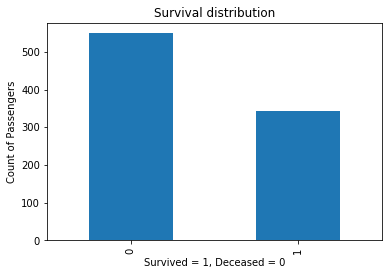

In [127]:
overall_survival_rate = final_train["Survived"].mean()
print("Overall Survival Rate was {:0.1%}".format(overall_survival_rate))
final_train["Survived"].value_counts().plot(kind = "bar")
plt.title("Survival distribution")
plt.ylabel("Count of Passengers")
plt.xlabel("Survived = 1, Deceased = 0")
plt.show()

Survival rate by sex.
 Male survival rate: 18.9% 
 Female survival rate: 74.2%


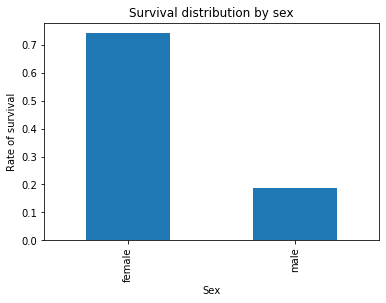

In [144]:
female_survival_rate = final_train.groupby("Sex").mean()["Survived"]['female']
male_survival_rate = final_train.groupby("Sex").mean()["Survived"]["male"]
print("Survival rate by sex.\n Male survival rate: {:0.1%} ".format(male_survival_rate)+"\n Female survival rate: {:0.1%}".format(female_survival_rate))
final_train.groupby("Sex").mean()["Survived"].plot(kind = "bar")
plt.title("Survival distribution by sex")
plt.ylabel("Rate of survival")
plt.xlabel("Sex")
plt.show()


Average age per gender


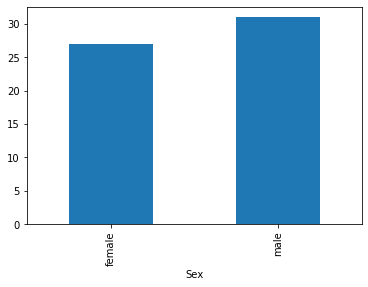

In [78]:
print("Average age per gender")
final_train.groupby("Sex").mean()["Age"].plot(kind = "bar")
plt.show()

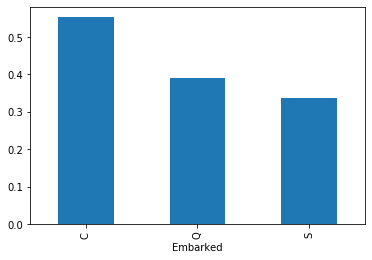

In [80]:
print("Survival rate based on where passengers embarkerd")
final_train.groupby("Embarked").mean()["Survived"].plot(kind = "bar")
plt.show()

Survival rate based on passenger's title


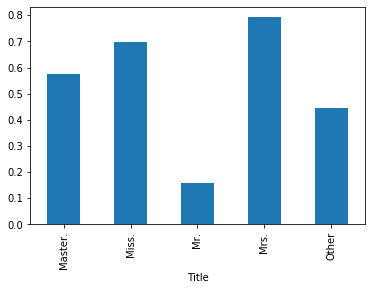

In [81]:
print("Survival rate based on passenger's title")
final_train.groupby("Title").mean()["Survived"].plot(kind = "bar")
plt.show()

Survival rate based on passengers ticket class


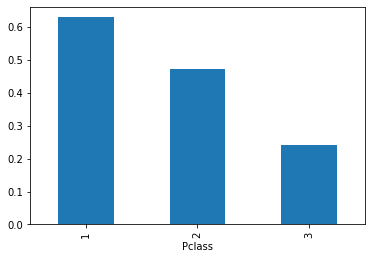

In [92]:
print("Survival rate based on passengers ticket class")
final_train.groupby("Pclass").mean()["Survived"].plot(kind = "bar")
plt.show()

survival rate by passenger sex and class


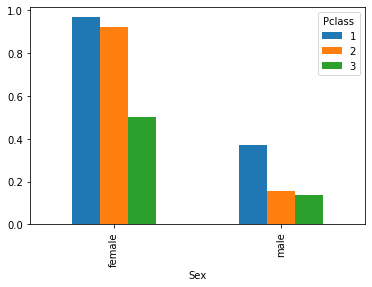

In [106]:
print("survival rate by passenger sex and class")
final_train.groupby(["Sex", 'Pclass']).mean()["Survived"].unstack().plot(kind = 'bar')
plt.show()

In [149]:
final_train["Age"] = final_train['Age'].astype(int)


In [151]:
final_train["Age"].describe()

count    891.000000
mean      29.570146
std       13.910321
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [163]:
final_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

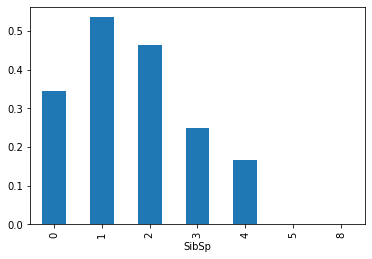

In [160]:
final_train.groupby(["SibSp"]).mean()["Survived"].plot(kind="bar")
plt.show()

In [164]:
final_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

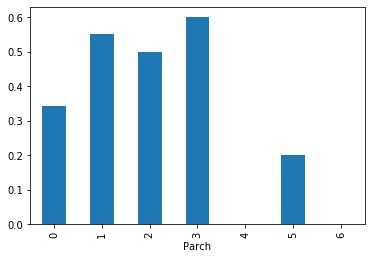

In [165]:
final_train.groupby(["Parch"]).mean()["Survived"].plot(kind="bar")
plt.show()

# Split the train dataframe into a test and train data set
Test dataset = Rows where age is null
Train dataset = Rows where age is known

# Address Missing values

Notice that there are a few of the columns whit missing value.
## Age 
Potentially could be a key indicator has a few null values.
- Option-1:
Impute a mean or median value. 
- Option-2:
Create a model to predict age and use that for the actual project.

## Cabin
Similarly, Cabin is missing some values. Since cabin has significantly higher count of missing value, and there may not be an easy way to impute 
- Option-1:
Drop the catagory 
- Option-2:
create another catagory where we assign cabin known or unknown binary value 

## Embarked
Embarked is also missing a couple of values. Since this is missing only two values, we may just impute with mode value. 

# Explore and visualize calculate coorelation 


# Drop Labels from train set